In [1]:
# import all the dependencies
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import time
from scipy.stats import norm

In [2]:
# Read the csv file starbucks_vs_cafe_count.csv
starbucks_usa = pd.read_csv("starbucks_usa.csv")
starbucks_usa.head()

,Brand,Store Number,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude,New_Country_Code,Avg_Temp_celcius,Continent
0,Starbucks,3513-125945,Licensed,Anchorage,AK,US,99504.0,-149.78,61.21,USA,7.939524,North America
1,Starbucks,74352-84449,Licensed,Anchorage,AK,US,99507.0,-149.84,61.14,USA,7.939524,North America
2,Starbucks,12449-152385,Licensed,Anchorage,AK,US,99515.0,-149.85,61.11,USA,7.939524,North America
3,Starbucks,24936-233524,Company Owned,Anchorage,AK,US,99515.0,-149.89,61.13,USA,7.939524,North America
4,Starbucks,8973-85630,Company Owned,Anchorage,AK,US,99515.0,-149.86,61.14,USA,7.939524,North America


In [3]:
# State with most number of starbucks
starbucks_usa['State/Province'].value_counts().head(1)

CA    2821
Name: State/Province, dtype: int64

In [4]:
# Top 10 States in USA based on number of stores
starbucks_usa['State/Province'].value_counts().head(10)

CA    2821
TX    1042
WA     757
FL     694
NY     645
IL     575
AZ     488
CO     481
VA     432
OH     378
Name: State/Province, dtype: int64

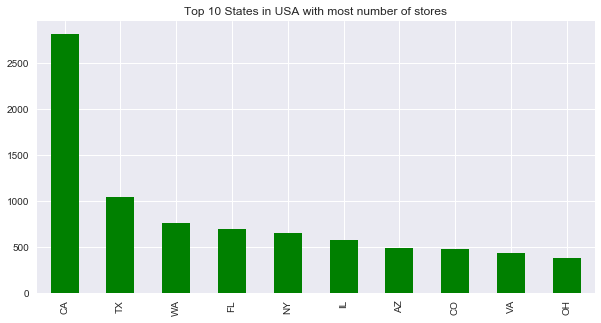

In [5]:
# Create a plot for top 10 states in USA based on number of stores
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title="Top 10 States in USA with most number of stores")
starbucks_usa['State/Province'].value_counts().head(10).plot(kind="bar", color='g')
# starbucks_usa['State/Province'].value_counts().head(25).plot(kind="bar")
plt.savefig("Number of Starbucks in Top 10 States(USA).png")
plt.show()

In [6]:
# Read another csv file with additional data (census data)
starbucks_usa_df = pd.read_csv("State_Zip.csv")
# Visualize
starbucks_usa_df.head()

,Unnamed: 0,State/Province,Postcode,Store Number,City,Country,Population,Median Age,Household Income,Per Capita Income,...,Race White,Race African American,Race American Indian,Race Asian,Race Pacific Islander,Race Two or More,perCapitaCategory,perCapitaBinned,ageCategory,ageBinned
0,0,AK,99501,2,Anchorage,US,17213,38.3,54579,39690,...,9757,1744,2194,1114,416,3187,2,"(36977.2, 73954.4]",3,"(35.8, 53.7]"
1,1,AK,99502,4,Anchorage,US,23649,32.8,87250,39021,...,16743,950,1428,1491,198,4441,2,"(36977.2, 73954.4]",2,"(17.9, 35.8]"
2,2,AK,99503,1,Anchorage,US,14107,34.0,46819,27693,...,7346,1231,1148,2024,631,2622,1,"(0.0, 36977.2]",2,"(17.9, 35.8]"
3,3,AK,99504,5,Anchorage,US,42189,31.3,77132,31811,...,23243,4529,3233,4430,1081,10362,1,"(0.0, 36977.2]",2,"(17.9, 35.8]"
4,4,AK,99505,1,Fort Richardson,US,6479,21.6,51582,19267,...,4429,922,39,181,13,1350,1,"(0.0, 36977.2]",2,"(17.9, 35.8]"


# Spread of Starbucks Stores in USA as per location : Longitude vs Latitude

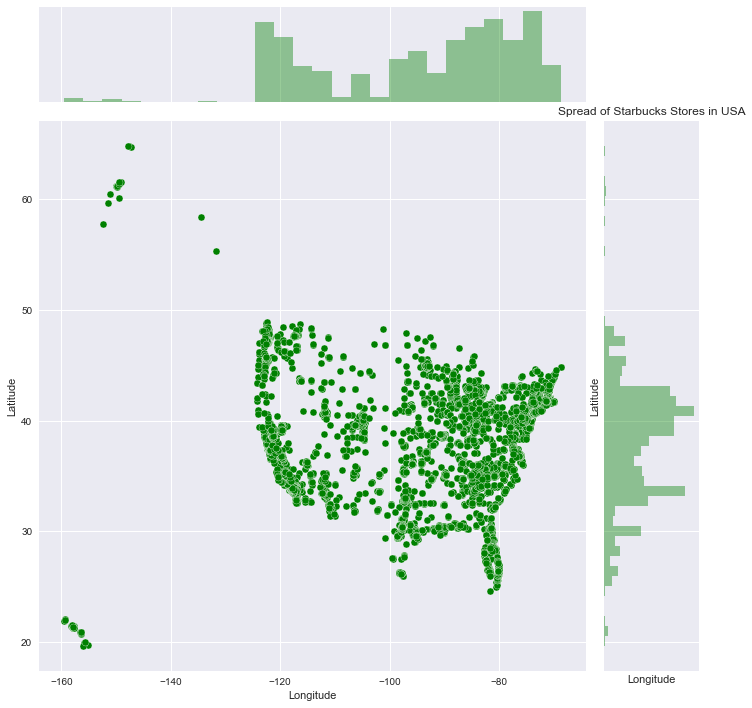

In [7]:
# Create a plot to show the spread of Starbucks stores throughout the country(USA)

# Create lists for coordinates
longitude = list(starbucks_usa_df["Longitude"])
latitude = list(starbucks_usa_df["Latitude"])

g = sns.JointGrid(x="Longitude", y="Latitude", data=starbucks_usa_df, size=10)
g = g.plot_joint(plt.scatter, color="g", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")

# Chart title
plt.title("Spread of Starbucks Stores in USA")
# x label
plt.xlabel("Longitude")
# y label
plt.ylabel("Latitude")
# Legend
plt.legend("")

# Save an image of the chart and print to screen
plt.savefig("Spread of Starbucks Stores in USA")
plt.show()

# How competitive is the coffee shop market in regards to Starbucks?

## Total number of Starbucks vs Nearby Cafes

In [8]:
# Read the csv file starbucks_vs_cafe_count.csv
starbucks_vs_cafe_count = pd.read_csv("starbucks_vs_cafe_count.csv")
starbucks_vs_cafe_count = starbucks_vs_cafe_count.rename(columns={"Starbucks Count":"Starbucks","Cafe Count":"Nearby Cafes"})
# Visualize the data frame
starbucks_vs_cafe_count.head()

,State/Province,Postcode,Starbucks,City,Country,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Nearby Cafes
0,AK,99501,2,Anchorage,US,61.22,-149.89,17213,38.3,54579,39690,35
1,AK,99502,4,Anchorage,US,61.18,-149.95,23649,32.8,87250,39021,10
2,AK,99503,1,Anchorage,US,61.18,-149.88,14107,34.0,46819,27693,54
3,AK,99504,5,Anchorage,US,61.23,-149.74,42189,31.3,77132,31811,8
4,AK,99505,1,Fort Richardson,US,61.26,-149.68,6479,21.6,51582,19267,0


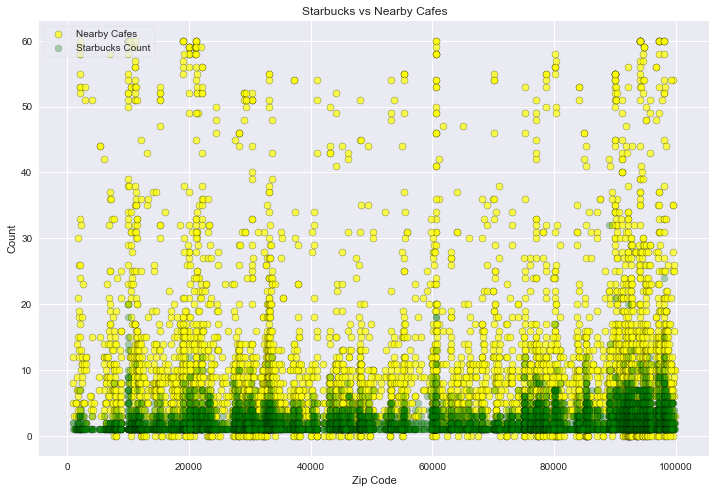

In [9]:
fig = plt.figure(figsize=(12,8))
plt.scatter(starbucks_vs_cafe_count['Postcode'], starbucks_vs_cafe_count['Nearby Cafes'], alpha=0.7, edgecolor='black', c="yellow", label="Nearby Cafes")

plt.scatter(starbucks_vs_cafe_count['Postcode'], starbucks_vs_cafe_count['Starbucks'], alpha=0.3, edgecolor='black', c="green", label="Starbucks Count")

plt.legend(loc="upper left", frameon=True, fontsize=10)
plt.xlabel("Zip Code")
plt.ylabel("Count")
plt.title("Starbucks vs Nearby Cafes")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Starbucks vs Nearby Cafes.png")

## Average number of Starbucks and nearby cafes per state

In [10]:
# Create a dataframe grouped by states with number starbucks and nearby cafes
grby_states = starbucks_vs_cafe_count.groupby("State/Province").aggregate({"Starbucks":"sum", "Nearby Cafes":"sum"})
grby_states.head()

,Starbucks,Nearby Cafes
State/Province,,
AK,49,336
AL,85,331
AR,55,244
AZ,488,1260
CA,2821,12323


In [11]:
# Create a dataframe grouped by states with number starbucks and nearby cafes
groupby_states = starbucks_vs_cafe_count.groupby("State/Province").aggregate({"Starbucks":"mean", "Nearby Cafes":"mean"})
# Export the dataframe to csv
groupby_states.to_csv("groupby_states.csv", index=False)
groupby_states.head()

,Starbucks,Nearby Cafes
State/Province,,
AK,2.130435,14.608696
AL,1.700000,6.620000
AR,1.527778,6.777778
AZ,2.757062,7.118644
CA,3.033333,13.250538


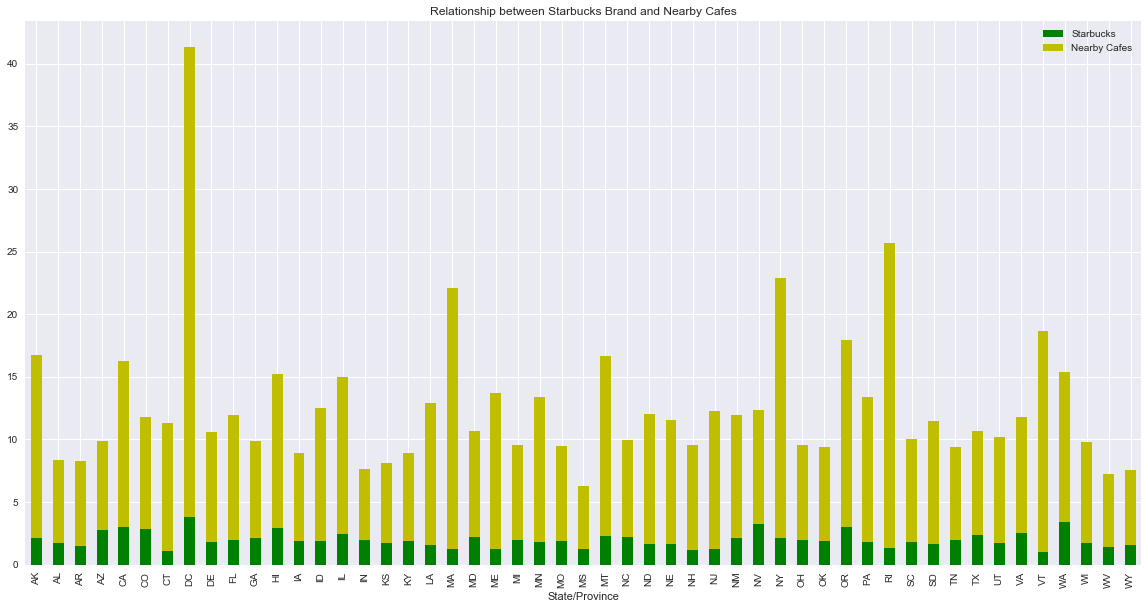

In [12]:
groupby_states.plot(kind="bar", figsize=(20,10), color=('g','y'), stacked=True,
                    title="Relationship between Starbucks Brand and Nearby Cafes")

plt.savefig("Relationship between Starbucks Brand and Nearby Cafes.png")
plt.show()

## Percentage of Starbucks Stores per state

In [13]:
# Ratio between Other cafes and Starbucks
percentage_of_starbucks = (groupby_states["Starbucks"] / (groupby_states["Starbucks"] + groupby_states["Nearby Cafes"] ) ) * 100
# Export the dataframe to csv
percentage_of_starbucks.to_csv("percentage_of_starbucks.csv", index=False)
percentage_of_starbucks.head()


State/Province
AK    12.727273
AL    20.432692
AR    18.394649
AZ    27.917620
CA    18.627839
dtype: float64

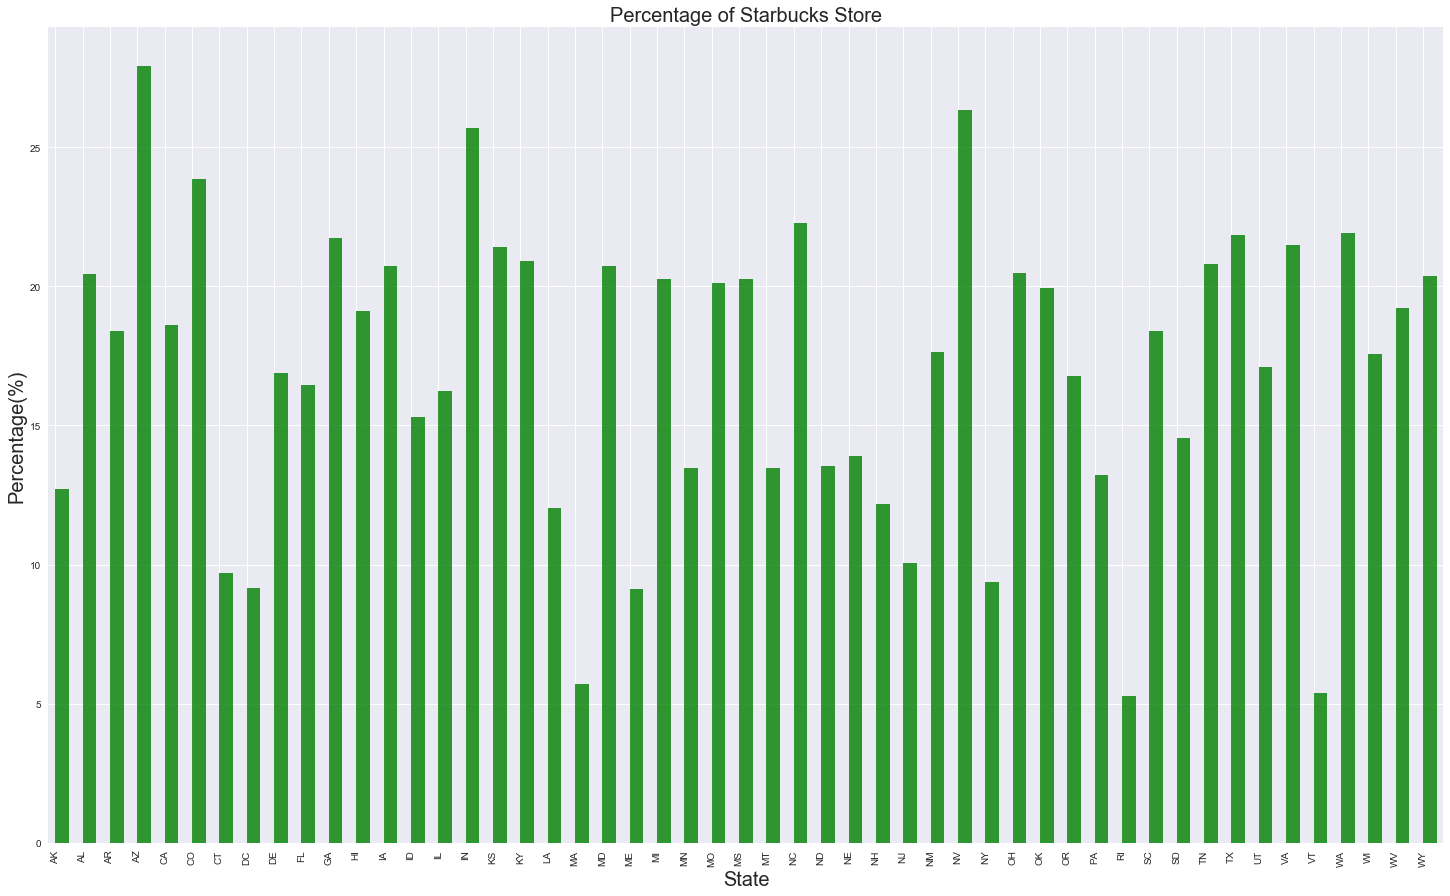

In [14]:
percentage_of_starbucks.plot(kind="bar", figsize=(25, 15), align='edge', alpha=.8, color = 'g')
plt.title("Percentage of Starbucks Store" , fontsize= 20)
plt.xlabel("State", fontsize= 20)
plt.ylabel("Percentage(%)", fontsize= 20)
plt.savefig("Percentage of Starbucks Store.png")
plt.show()